In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from datetime import date
import datetime
pd.set_option('display.max_rows', None)

In [2]:
df = pd.read_csv('MA_ppe_entities.csv', index_col='Time', parse_dates=True)
daterange = pd.date_range(start='2020-04-29', end='2020-09-09', freq='7D')
daterange_ex = pd.date_range(start='2020-06-03', end='2020-06-17', freq='7D')
df = df[df.index.isin(daterange)]
df = df[~df.index.isin(daterange_ex)]
df

,Region,Entity,N95s/KN95s,Masks,Gowns,Gloves,Ventilators
Time,,,,,,,
2020-04-29,Massachusetts,Nursing home/Senior living,267285,600400,53525,489100,0
2020-04-29,Massachusetts,Hospital,200000,165200,21436,104000,675
2020-04-29,Massachusetts,Community health center,44550,69750,8013,53400,0
2020-04-29,Massachusetts,"Local Municipalities (e.g. Fire, Police, Publi...",122634,282141,119532,1060650,0
2020-04-29,Massachusetts,Public safety (30-day supply),167325,0,0,0,0
2020-04-29,Massachusetts,EMS (Private),29520,18300,1668,34000,0
2020-04-29,Massachusetts,Local BOH,10325,19500,786,38000,0
2020-04-29,Massachusetts,State agency,44376,166258,31265,1371080,0
2020-04-29,Massachusetts,Other (e.g. home and pediatric care),104811,541863,49570,837054,0


# Massachusetts

In [3]:
MA = df[df['Region']=='Massachusetts']
# MA

In [4]:
# Calculate distribution of PPE by entities for Massachusetts
categories = ['N95s/KN95s', 'Masks', 'Gowns', 'Gloves', 'Ventilators']
Entities = ['Community health center', 'EMS (Private)', 'Hospital', 'Local BOH', 'Local Municipalities (e.g. Fire, Police, Public EMS)',
           'Nursing home/Senior living', 'Other (e.g. home and pediatric care)', 'Public safety (30-day supply)', 'State agency']
MA_N95 = MA[['Entity','N95s/KN95s']].pivot(columns='Entity', values='N95s/KN95s').astype(float)
MA_Masks = MA[['Entity','Masks']].pivot(columns='Entity', values='Masks').astype(float)
MA_Gloves = MA[['Entity','Gloves']].pivot(columns='Entity', values='Gloves').astype(float)
MA_Gowns = MA[['Entity','Gowns']].pivot(columns='Entity', values='Gowns').astype(float)
# MA_N95

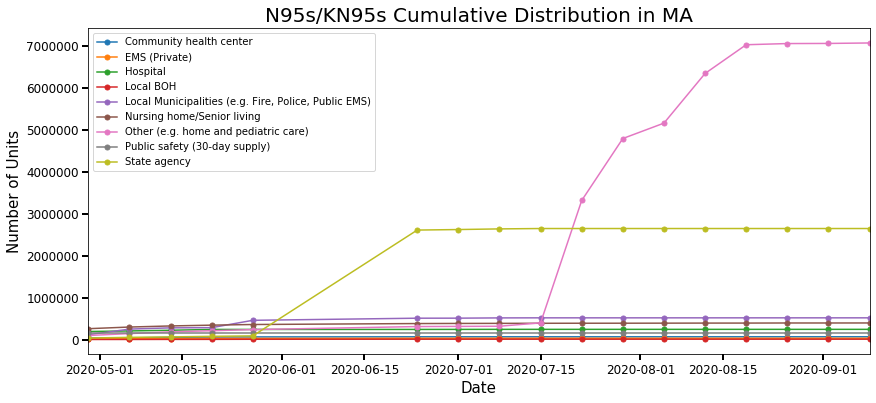

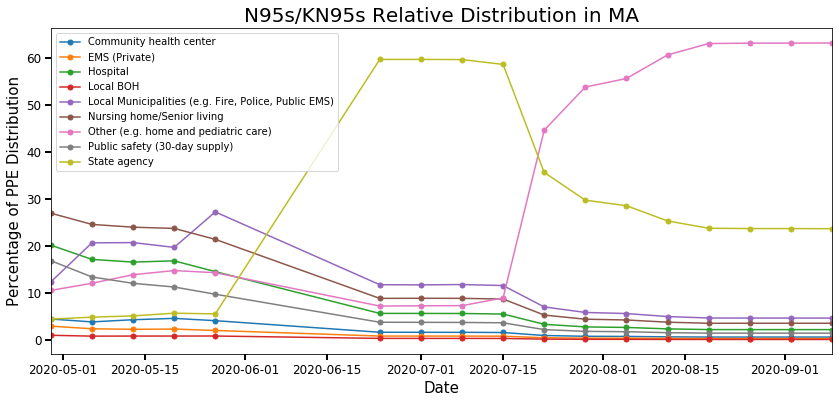

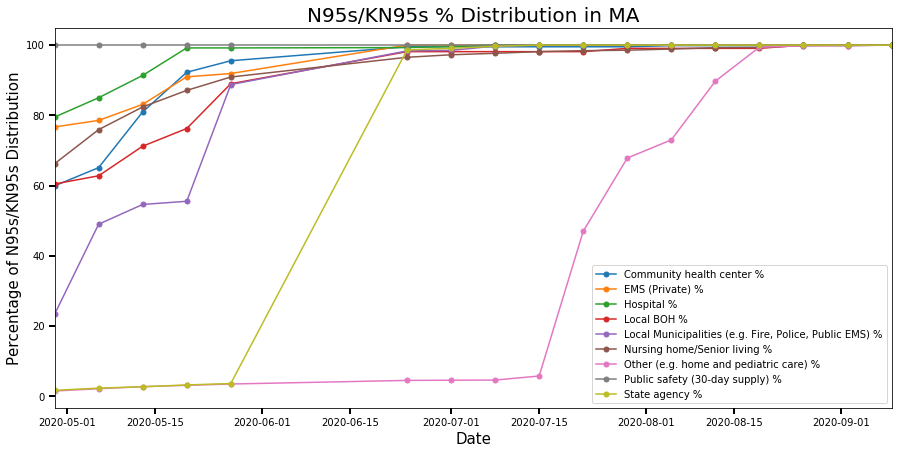

In [5]:
# N95s/KN95s Distribution by Entities in MA
for entity in Entities:
    MA_N95['{} relative %'.format(entity)] = MA_N95[entity] / MA_N95['Total'] * 100
    MA_N95['{} %'.format(entity)] = MA_N95[entity] / MA_N95[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(14,6))
for entity in Entities:
    ax1.plot(MA_N95.index, entity, data=MA_N95, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=12)
ax1.legend(fontsize=10)
ax1.set_title('N95s/KN95s Cumulative Distribution in MA', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(14,6))
for entity in Entities:
    ax2.plot(MA_N95.index, '{} relative %'.format(entity), data=MA_N95, marker='.', markersize=10, label='{}'.format(entity))
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of PPE Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=12)
ax2.legend(fontsize=10)
ax2.set_title('N95s/KN95s Relative Distribution in MA', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_N95.index, '{} %'.format(entity), data=MA_N95, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of N95s/KN95s Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('N95s/KN95s % Distribution in MA', fontsize=20)
plt.show()
# MA_N95    

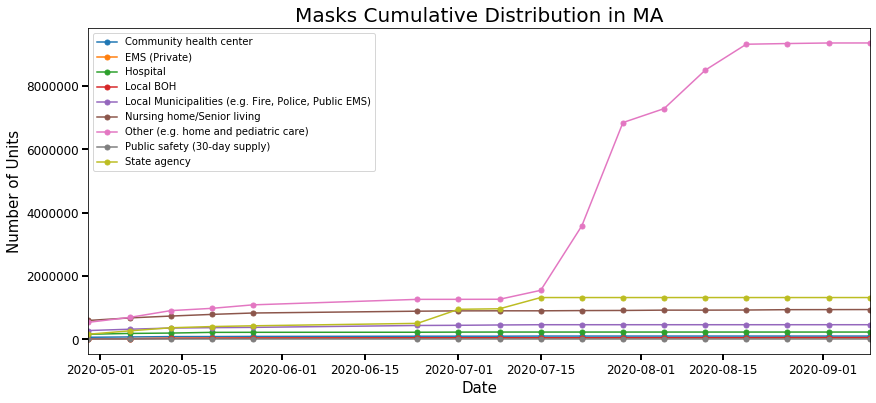

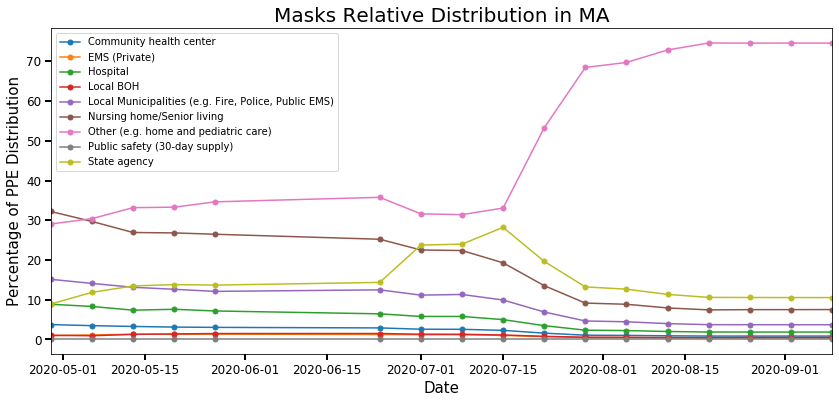

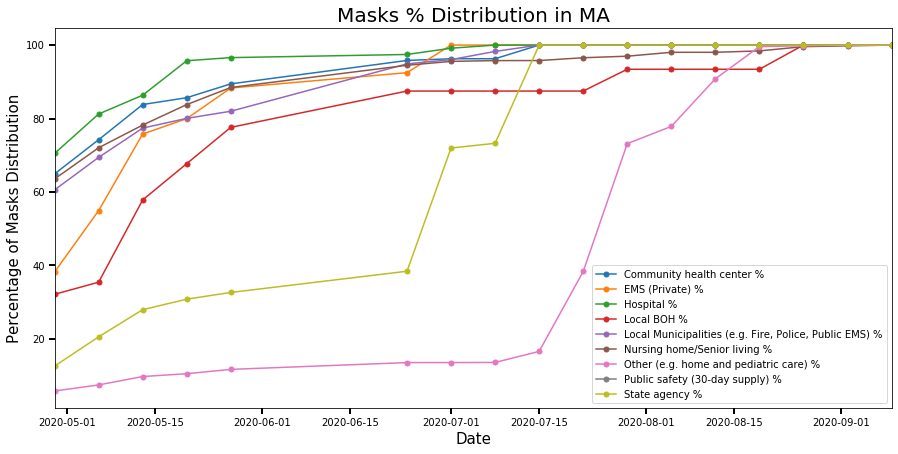

In [6]:
# Masks Distribution by Entities in MA
for entity in Entities:
    MA_Masks['{} relative %'.format(entity)] = MA_Masks[entity] / MA_Masks['Total'] * 100
    MA_Masks['{} %'.format(entity)] = MA_Masks[entity] / MA_Masks[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(14,6))
for entity in Entities:
    ax1.plot(MA_Masks.index, entity, data=MA_Masks, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=12)
ax1.legend(fontsize=10)
ax1.set_title('Masks Cumulative Distribution in MA', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(14,6))
for entity in Entities:
    ax2.plot(MA_Masks.index, '{} relative %'.format(entity), data=MA_Masks, marker='.', markersize=10, label='{}'.format(entity))
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of PPE Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=12)
ax2.legend(fontsize=10)
ax2.set_title('Masks Relative Distribution in MA', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_Masks.index, '{} %'.format(entity), data=MA_Masks, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of Masks Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Masks % Distribution in MA', fontsize=20)
plt.show()
# MA_Masks    

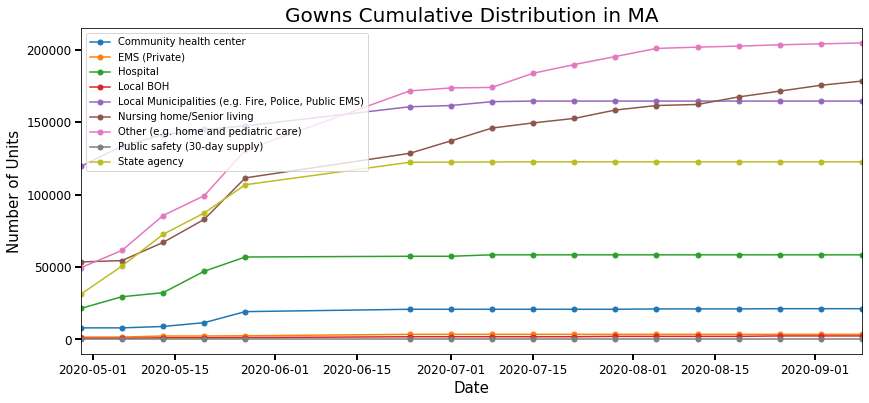

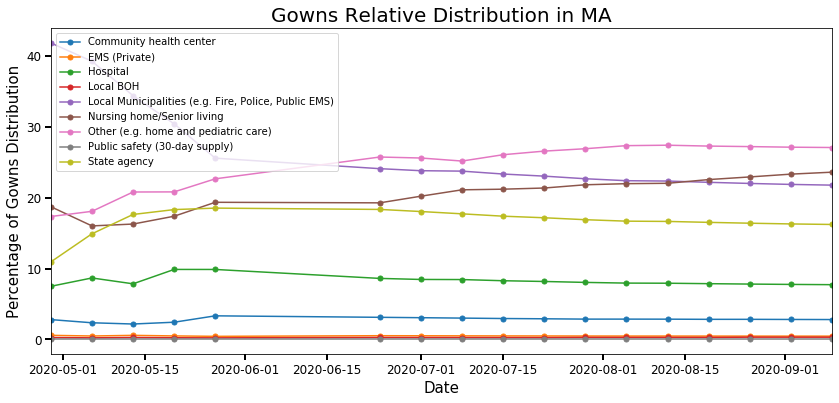

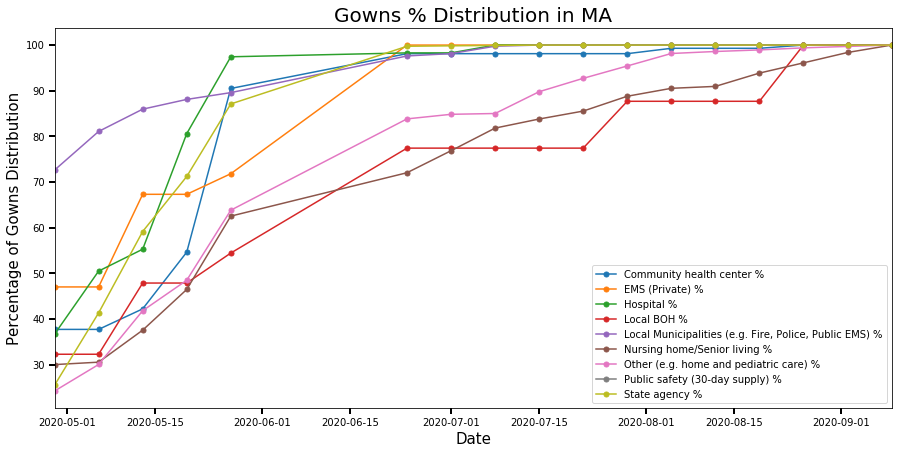

In [7]:
# Gowns Distribution by Entities in MA
for entity in Entities:
    MA_Gowns['{} relative %'.format(entity)] = MA_Gowns[entity] / MA_Gowns['Total'] * 100
    MA_Gowns['{} %'.format(entity)] = MA_Gowns[entity] / MA_Gowns[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(14,6))
for entity in Entities:
    ax1.plot(MA_Gowns.index, entity, data=MA_Gowns, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=12)
ax1.legend(fontsize=10)
ax1.set_title('Gowns Cumulative Distribution in MA', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(14,6))
for entity in Entities:
    ax2.plot(MA_Gowns.index, '{} relative %'.format(entity), data=MA_Gowns, marker='.', markersize=10, label='{}'.format(entity))
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of Gowns Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=12)
ax2.legend(fontsize=10)
ax2.set_title('Gowns Relative Distribution in MA', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_Gowns.index, '{} %'.format(entity), data=MA_Gowns, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of Gowns Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Gowns % Distribution in MA', fontsize=20)
plt.show()
# MA_Gowns    

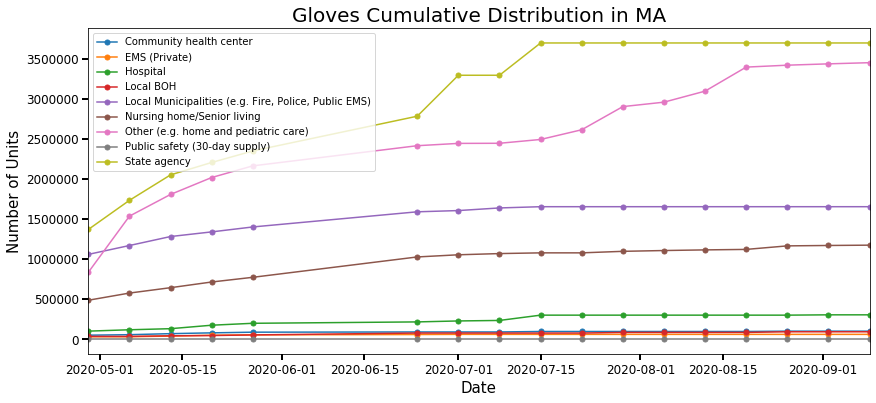

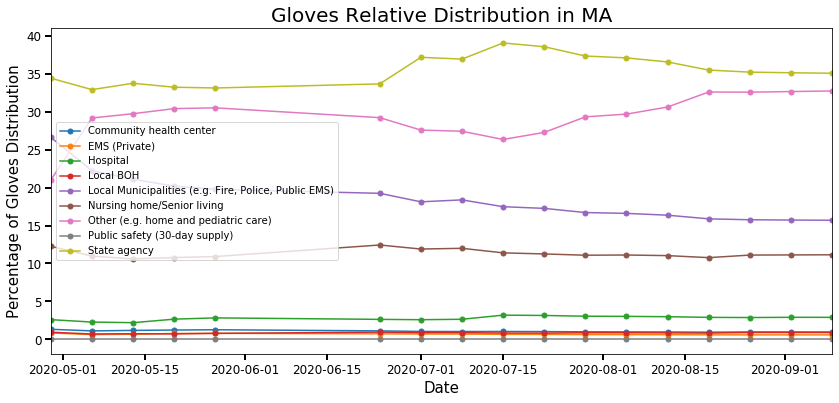

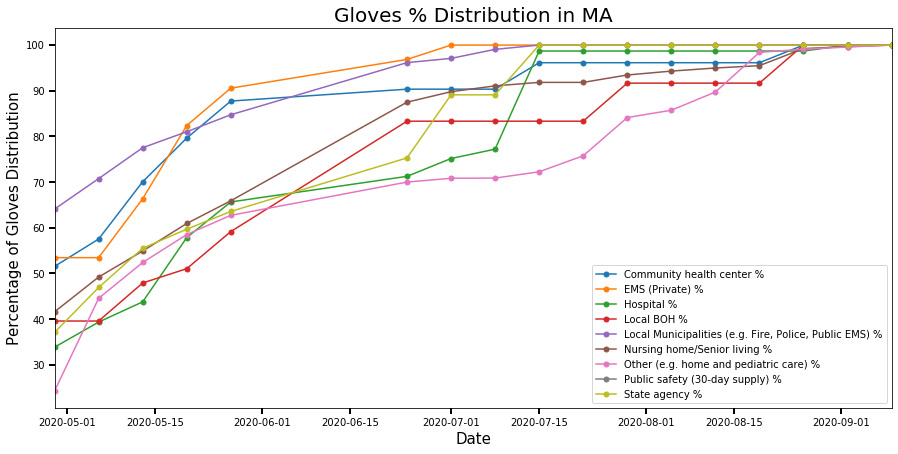

In [8]:
# Gloves Distribution by Entities in MA
for entity in Entities:
    MA_Gloves['{} relative %'.format(entity)] = MA_Gloves[entity] / MA_Gloves['Total'] * 100
    MA_Gloves['{} %'.format(entity)] = MA_Gloves[entity] / MA_Gloves[entity].iloc[-1] * 100

fig1, ax1 = plt.subplots(1, 1, figsize=(14,6))
for entity in Entities:
    ax1.plot(MA_Gloves.index, entity, data=MA_Gloves, marker='.', markersize=10)
ax1.set_xlabel('Date', fontsize=15)
ax1.set_ylabel('Number of Units', fontsize=15)
ax1.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax1.tick_params(direction='out', length=6, width=2, labelsize=12)
ax1.legend(fontsize=10)
ax1.set_title('Gloves Cumulative Distribution in MA', fontsize=20)

fig2, ax2 = plt.subplots(1, 1,figsize=(14,6))
for entity in Entities:
    ax2.plot(MA_Gloves.index, '{} relative %'.format(entity), data=MA_Gloves, marker='.', markersize=10, label='{}'.format(entity))
ax2.set_xlabel('Date', fontsize=15)
ax2.set_ylabel('Percentage of Gloves Distribution', fontsize=15)
ax2.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax2.tick_params(direction='out', length=6, width=2, labelsize=12)
ax2.legend(fontsize=10)
ax2.set_title('Gloves Relative Distribution in MA', fontsize=20)

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
for entity in Entities:
    ax3.plot(MA_Gloves.index, '{} %'.format(entity), data=MA_Gloves, marker='.', markersize=10)
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Percentage of Gloves Distribution', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Gloves % Distribution in MA', fontsize=20)
plt.show()
# MA_Gloves  

Text(0.5, 1.0, 'Cumulative PPE Distribution to Hospitals in MA')

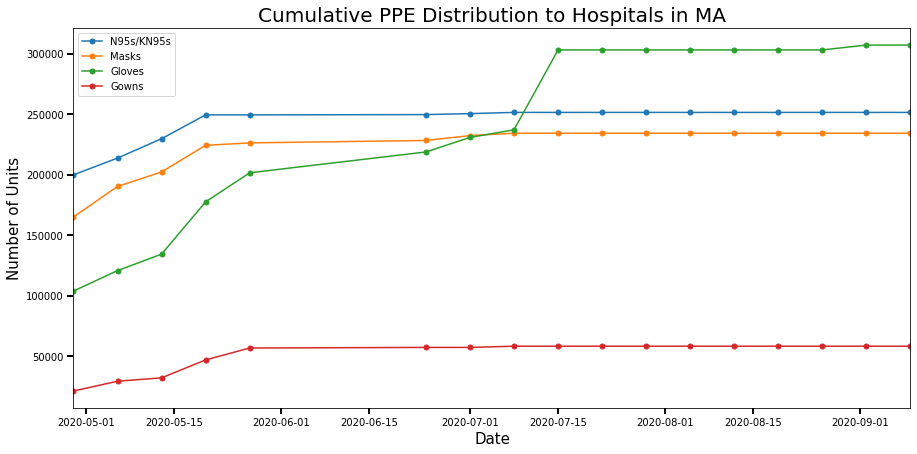

In [9]:
# PPE distribution to Hospitals

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax3.plot(df.index, 'Hospital', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Number of Units', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Cumulative PPE Distribution to Hospitals in MA', fontsize=20)

Text(0.5, 1.0, 'Cumulative PPE Distribution to Other (e.g. home and pediatric care) in MA')

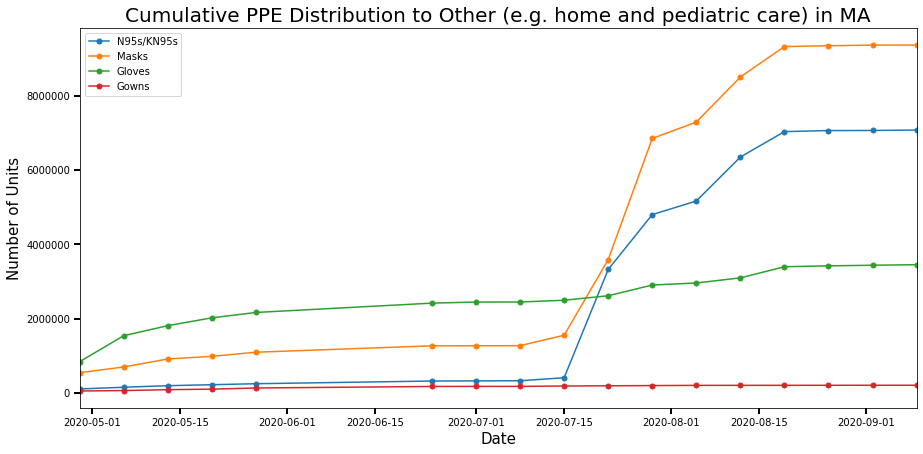

In [10]:
# PPE distribution to Other (e.g. home and pediatric care)

fig4, ax4 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax4.plot(df.index, 'Other (e.g. home and pediatric care)', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax4.set_xlabel('Date', fontsize=15)
ax4.set_ylabel('Number of Units', fontsize=15)
ax4.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax4.tick_params(direction='out', length=6, width=2, labelsize=10)
ax4.legend()
ax4.set_title('Cumulative PPE Distribution to Other (e.g. home and pediatric care) in MA', fontsize=20)

Text(0.5, 1.0, 'Cumulative PPE Distribution to Local Municipalities (e.g. Fire, Police, Public EMS) in MA')

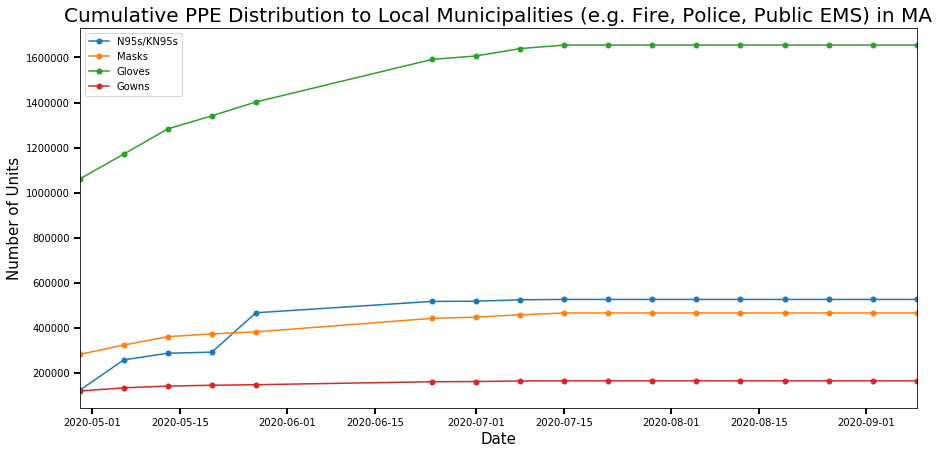

In [11]:
# PPE distribution to Local Municipalities (e.g. Fire, Police, Public EMS)

fig4, ax4 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax4.plot(df.index, 'Local Municipalities (e.g. Fire, Police, Public EMS)', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax4.set_xlabel('Date', fontsize=15)
ax4.set_ylabel('Number of Units', fontsize=15)
ax4.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax4.tick_params(direction='out', length=6, width=2, labelsize=10)
ax4.legend()
ax4.set_title('Cumulative PPE Distribution to Local Municipalities (e.g. Fire, Police, Public EMS) in MA', fontsize=20)

Text(0.5, 1.0, 'Cumulative PPE Distribution to Nursing home in MA')

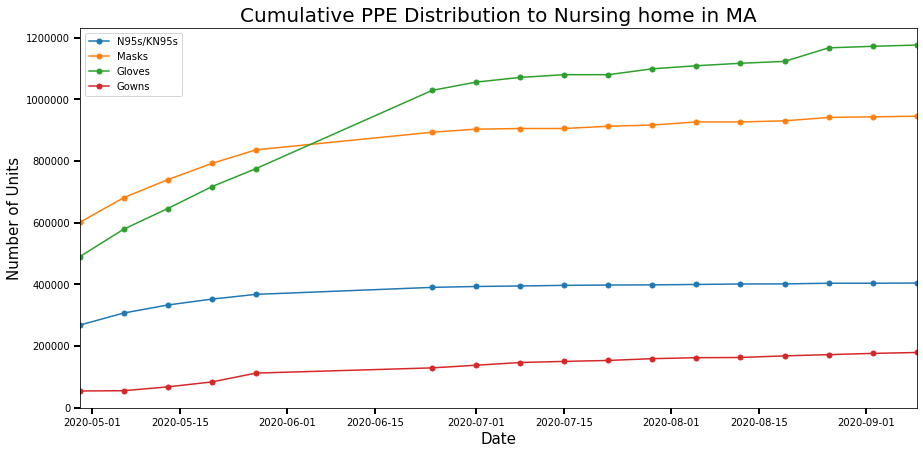

In [12]:
# PPE distribution to Hospitals

fig3, ax3 = plt.subplots(1, 1,figsize=(15,7))
dataset = [MA_N95, MA_Masks, MA_Gloves, MA_Gowns]
ppes = ['N95s/KN95s', 'Masks', 'Gloves', 'Gowns']
i = 0
for df in dataset:
    ax3.plot(df.index, 'Nursing home/Senior living', data=df, marker='.', markersize=10, label=ppes[i])
    i += 1
ax3.set_xlabel('Date', fontsize=15)
ax3.set_ylabel('Number of Units', fontsize=15)
ax3.set_xlim([datetime.date(2020,4,29), datetime.date(2020,9,9)])
ax3.tick_params(direction='out', length=6, width=2, labelsize=10)
ax3.legend()
ax3.set_title('Cumulative PPE Distribution to Nursing home in MA', fontsize=20)

In [13]:
MA_NH = MA[MA['Entity']=='Nursing home/Senior living']
daterange = pd.date_range(start='2020-06-24', end='2020-09-09', freq='7D')
MA_NH = MA_NH[MA_NH.index.isin(daterange)]

MA_SA = MA[MA['Entity']=='State agency']
daterange = pd.date_range(start='2020-06-24', end='2020-09-09', freq='7D')
MA_SA = MA_SA[MA_SA.index.isin(daterange)]

MA_PS = MA[MA['Entity']=='Public safety (30-day supply)']
daterange = pd.date_range(start='2020-06-24', end='2020-09-09', freq='7D')
MA_PS = MA_PS[MA_PS.index.isin(daterange)]

MA_LM = MA[MA['Entity']=='Local Municipalities (e.g. Fire, Police, Public EMS)']
daterange = pd.date_range(start='2020-06-24', end='2020-09-09', freq='7D')
MA_LM = MA_LM[MA_LM.index.isin(daterange)]

MA_OT = MA[MA['Entity']=='Other (e.g. home and pediatric care)']
daterange = pd.date_range(start='2020-06-24', end='2020-09-09', freq='7D')
MA_OT = MA_OT[MA_OT.index.isin(daterange)]

Text(0.5, 1.0, 'New Distribution to Nursing home in MA')

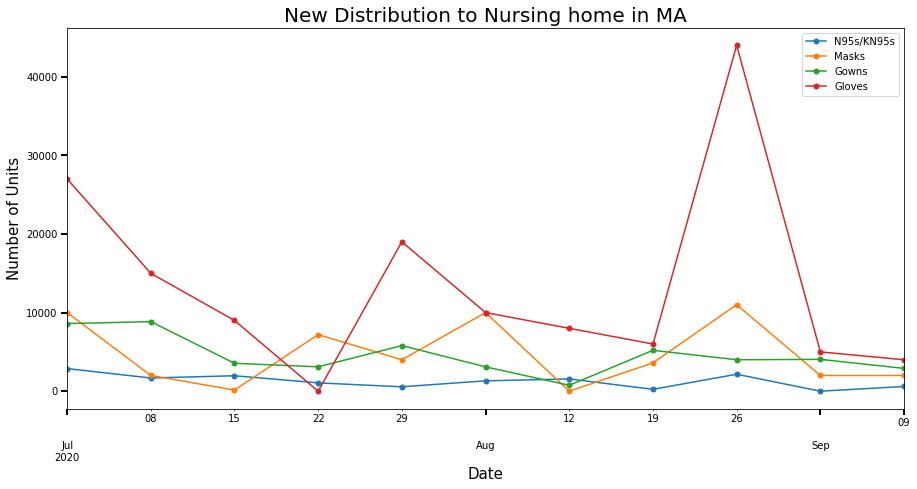

In [14]:
# Nursing Home Weekly Increase
fig, ax = plt.subplots(1,1,figsize=(15, 7))
MA_NH['N95s/KN95s'].astype(float).diff().plot(legend='N95s', ax=ax, marker='.',markersize=10)
MA_NH['Masks'].astype(float).diff().plot(legend='Masks',ax=ax, marker='.',markersize=10)
MA_NH['Gowns'].astype(float).diff().plot(legend='Gowns',ax=ax, marker='.',markersize=10)
MA_NH['Gloves'].astype(float).diff().plot(legend='Gloves',ax=ax, marker='.',markersize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_xlim([datetime.date(2020,7,1), datetime.date(2020,9,9)])
ax.tick_params(direction='out', length=6, width=2, labelsize=10)
ax.legend()
ax.set_title('New Distribution to Nursing home in MA', fontsize=20)

Text(0.5, 1.0, 'New Distribution to State agency in MA')

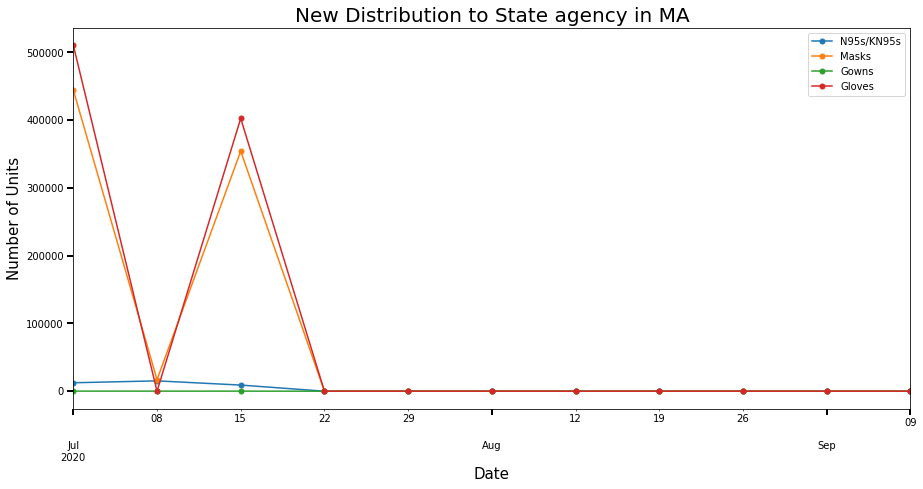

In [15]:
# State Agency Weekly Increase
fig, ax = plt.subplots(1,1,figsize=(15, 7))
MA_SA['N95s/KN95s'].astype(float).diff().plot(legend='N95s', ax=ax, marker='.',markersize=10)
MA_SA['Masks'].astype(float).diff().plot(legend='Masks',ax=ax, marker='.',markersize=10)
MA_SA['Gowns'].astype(float).diff().plot(legend='Gowns',ax=ax, marker='.',markersize=10)
MA_SA['Gloves'].astype(float).diff().plot(legend='Gloves',ax=ax, marker='.',markersize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_xlim([datetime.date(2020,7,1), datetime.date(2020,9,9)])
ax.tick_params(direction='out', length=6, width=2, labelsize=10)
ax.legend()
ax.set_title('New Distribution to State agency in MA', fontsize=20)

Text(0.5, 1.0, 'New Distribution to Public safety in MA')

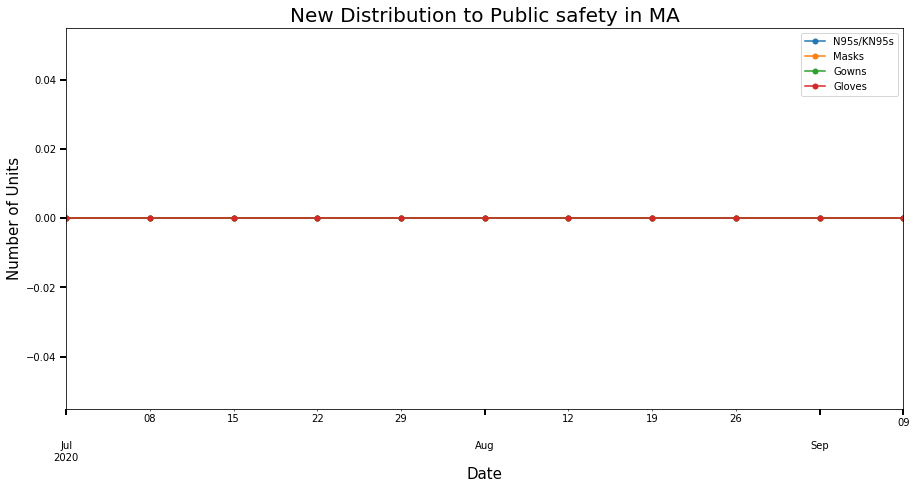

In [16]:
# Public Safty Weekly Increase(Remain same all the time)
fig, ax = plt.subplots(1,1,figsize=(15, 7))
MA_PS['N95s/KN95s'].astype(float).diff().plot(legend='N95s', ax=ax, marker='.',markersize=10)
MA_PS['Masks'].astype(float).diff().plot(legend='Masks',ax=ax, marker='.',markersize=10)
MA_PS['Gowns'].astype(float).diff().plot(legend='Gowns',ax=ax, marker='.',markersize=10)
MA_PS['Gloves'].astype(float).diff().plot(legend='Gloves',ax=ax, marker='.',markersize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_xlim([datetime.date(2020,7,1), datetime.date(2020,9,9)])
ax.tick_params(direction='out', length=6, width=2, labelsize=10)
ax.legend()
ax.set_title('New Distribution to Public safety in MA', fontsize=20)

Text(0.5, 1.0, 'New Distribution to Local municipalities in MA')

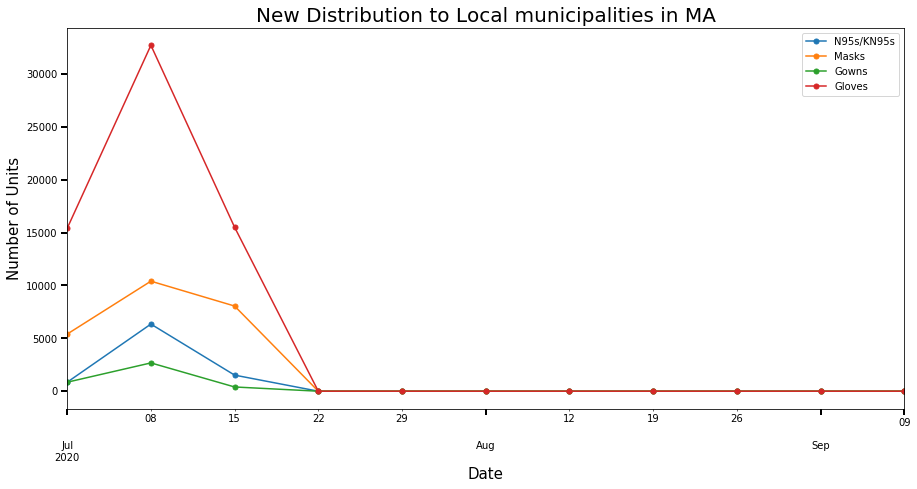

In [17]:
# Local Municipalities Weekly Increase
fig, ax = plt.subplots(1,1,figsize=(15, 7))
MA_LM['N95s/KN95s'].astype(float).diff().plot(legend='N95s', ax=ax, marker='.',markersize=10)
MA_LM['Masks'].astype(float).diff().plot(legend='Masks',ax=ax, marker='.',markersize=10)
MA_LM['Gowns'].astype(float).diff().plot(legend='Gowns',ax=ax, marker='.',markersize=10)
MA_LM['Gloves'].astype(float).diff().plot(legend='Gloves',ax=ax, marker='.',markersize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_xlim([datetime.date(2020,7,1), datetime.date(2020,9,9)])
ax.tick_params(direction='out', length=6, width=2, labelsize=10)
ax.legend()
ax.set_title('New Distribution to Local municipalities in MA', fontsize=20)

Text(0.5, 1.0, 'New Distribution to Other in MA')

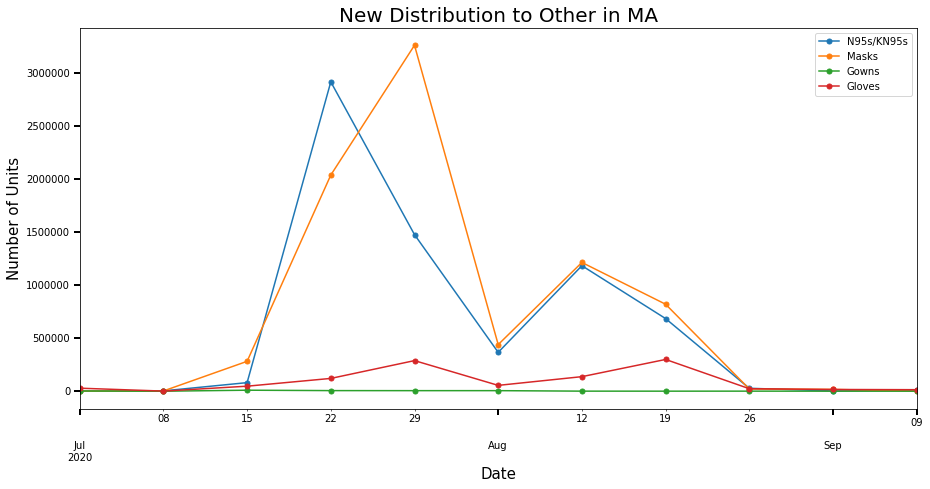

In [18]:
# Other Weekly Increase
fig, ax = plt.subplots(1,1,figsize=(15, 7))
MA_OT['N95s/KN95s'].astype(float).diff().plot(legend='N95s', ax=ax, marker='.',markersize=10)
MA_OT['Masks'].astype(float).diff().plot(legend='Masks',ax=ax, marker='.',markersize=10)
MA_OT['Gowns'].astype(float).diff().plot(legend='Gowns',ax=ax, marker='.',markersize=10)
MA_OT['Gloves'].astype(float).diff().plot(legend='Gloves',ax=ax, marker='.',markersize=10)
ax.set_xlabel('Date', fontsize=15)
ax.set_ylabel('Number of Units', fontsize=15)
ax.set_xlim([datetime.date(2020,7,1), datetime.date(2020,9,9)])
ax.tick_params(direction='out', length=6, width=2, labelsize=10)
ax.legend()
ax.set_title('New Distribution to Other in MA', fontsize=20)